# Importação de bibliotecas

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Libraries for oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE

import time # Biblioteca utilizada para cálculo de tempo de treinamento de modelos
import pandas as pd
from numpy import mean
from numpy import std

# Base de dados Taiwan

## Importação dos dados

In [2]:
df = pd.read_excel('Taiwan default of credit card clients.xls', skiprows=[0])
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
0   1      20000    2          2         1   24      2      2     -1     -1  \
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
0  ...          0          0          0         0       689         0  \
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

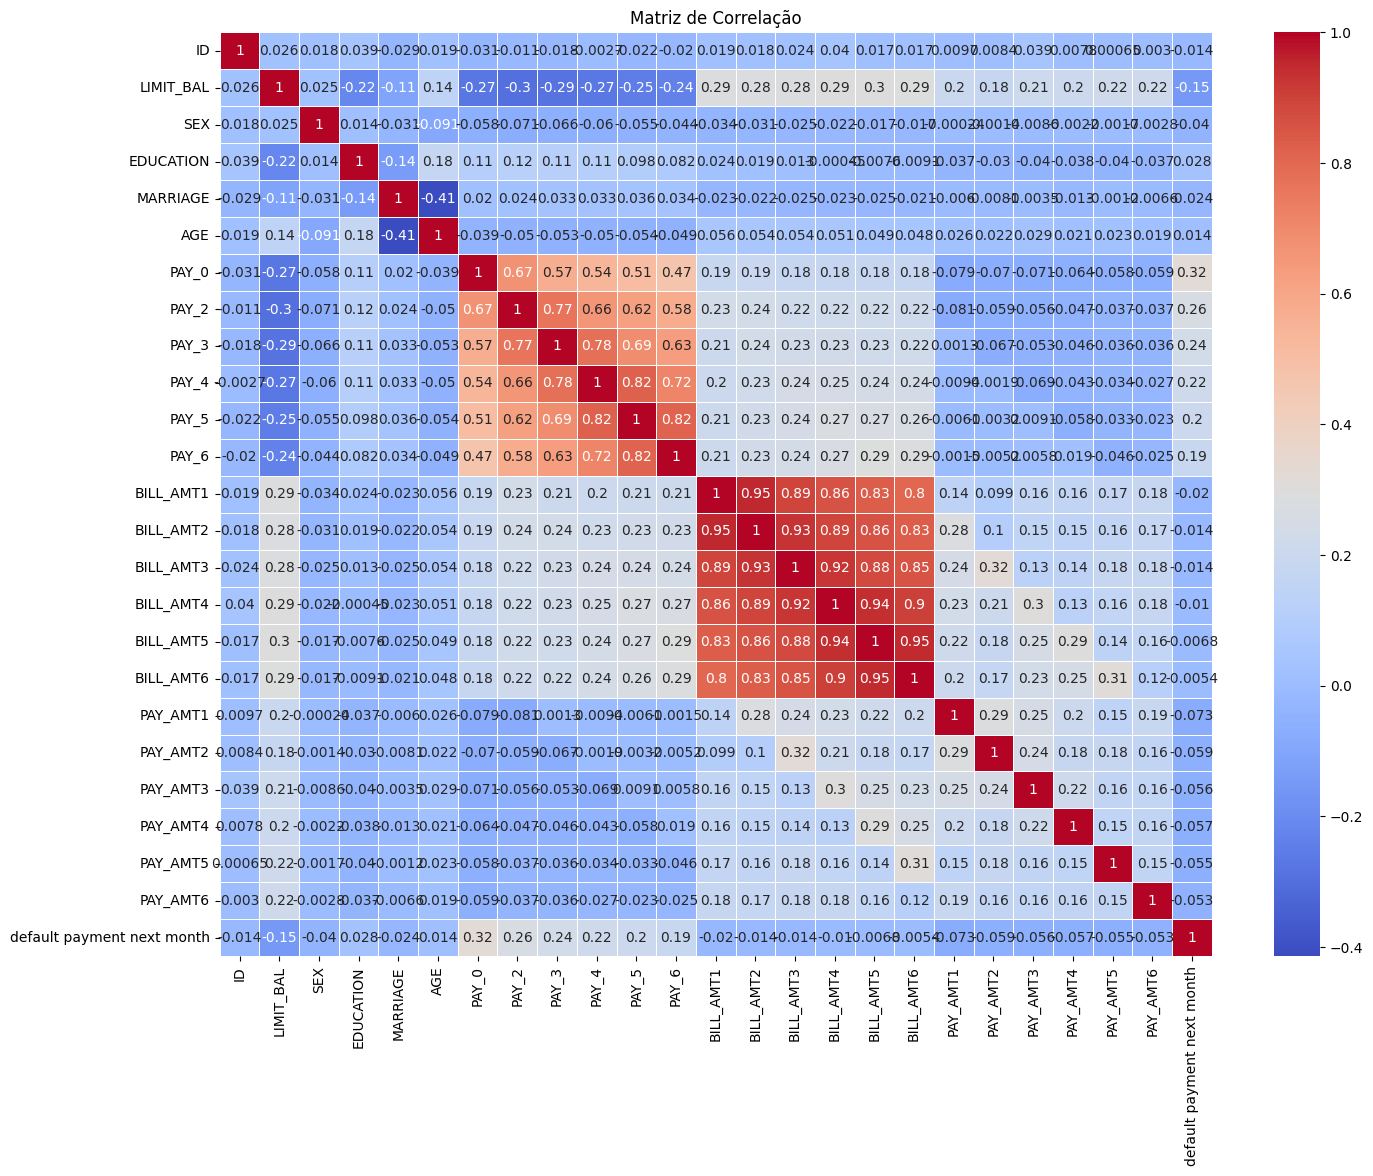

In [3]:
plt.figure(figsize=(16, 12))  # Tamanho da figura (opcional)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

## ETL

### Verificação de valores nulos

In [4]:
df.isna().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Resumo estatístico

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Análise das colunas

In [8]:
df.SEX.value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [9]:
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [10]:
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [11]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [12]:
df.shape

(30000, 25)

### Normalização dos valores das colunas

In [13]:
scaler = MinMaxScaler()

dfTest = df.copy()
dfTest = dfTest.drop('ID', axis=1)

dfTest[['LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = scaler.fit_transform(dfTest[['LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

dfTest.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.010101,2,2,1,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0.111111,2,2,2,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0.080808,2,2,2,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0.040404,2,2,1,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0.040404,1,2,1,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


## Separação dos valores
### Variável target separada para divisão proporcional dos grupos de treinamento e teste

In [14]:
dfTest_1 = dfTest[dfTest['default payment next month'] == 1]
dfTest_0 = dfTest[dfTest['default payment next month'] == 0]

In [15]:
X1_train, X1_test, y1_train, y1_test = train_test_split(dfTest_1.drop(columns='default payment next month'), dfTest_1['default payment next month'], test_size=0.3, random_state=1)
X0_train, X0_test, y0_train, y0_test = train_test_split(dfTest_0.drop(columns='default payment next month'), dfTest_0['default payment next month'], test_size=0.3, random_state=1)

In [16]:
X_train = pd.concat([X1_train, X0_train], ignore_index = True, sort = False)
X_test = pd.concat([X1_test, X0_test], ignore_index = True, sort = False)
y_train = pd.concat([y1_train, y0_train], ignore_index = True, sort = False)
y_test = pd.concat([y1_test, y0_test], ignore_index = True, sort = False)

In [20]:
print(X_test.values)

[[1.41414141e-01 2.00000000e+00 1.00000000e+00 ... 6.44122383e-03
  9.37802588e-03 6.62043710e-03]
 [4.04040404e-02 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.04040404e-02 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.72727273e-01 1.00000000e+00 1.00000000e+00 ... 8.07568438e-03
  7.50546856e-02 2.26986415e-05]
 [3.13131313e-01 1.00000000e+00 2.00000000e+00 ... 1.61030596e-03
  6.37705760e-04 5.67466037e-04]
 [4.94949495e-01 2.00000000e+00 2.00000000e+00 ... 1.34943639e-03
  1.04940110e-02 4.58436896e-02]]


In [17]:
X = pd.concat([X_train, X_test], ignore_index = True, sort = False)
y = pd.concat([y_train, y_test], ignore_index = True, sort = False)

## Modelos de Machine Learning

### Otimização de hiperparâmetros

#### Regressão Logística

In [18]:
# Modelo de regressão Logística
modelLR = LogisticRegression()

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2']
space['C'] = [1e-3, 1, 10]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
# search = RandomizedSearchCV(modelLR, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelLR, param_grid=space, scoring='accuracy', cv=cv, n_jobs=-1)
gs = GridSearchCV(estimator=modelLR, param_grid=space, scoring='recall', cv=cv, n_jobs=-1)

result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])

print('LR Best Score: %s' % result.best_score_)
print('LR Best Hyperparameters: %s' % result.best_params_)

LR Best Score: 0.238899943666067
LR Best Hyperparameters: {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}


C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

#### KNN

In [19]:
modelKNN = KNeighborsClassifier()

k_range = list(range(1, 31))
space = dict(n_neighbors=k_range)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# search = RandomizedSearchCV(modelKNN, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelKNN, param_grid=space, scoring='accuracy', cv=cv, n_jobs=-1)
gs = GridSearchCV(estimator=modelKNN, param_grid=space, scoring='recall', cv=cv, n_jobs=-1)

result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])

print('KNN Best Score: %s' % result.best_score_)
print('KNN Best Hyperparameters: %s' % result.best_params_)

KNN Best Score: 0.3896951304463707
KNN Best Hyperparameters: {'n_neighbors': 1}


#### Árvore de Decisão

In [20]:
modelDT = DecisionTreeClassifier()

# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [2,6,8,12]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
# search = RandomizedSearchCV(modelDT, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelDT, param_grid=space, scoring='accuracy', cv=cv, n_jobs=-1)
gs = GridSearchCV(estimator=modelDT, param_grid=space, scoring='recall', cv=cv, n_jobs=-1)

result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])

print('DT Best Score: %s' % result.best_score_)
print('DT Best Hyperparameters: %s' % result.best_params_)

DT Best Score: 0.3757244664934248
DT Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 12}


#### ANN

In [21]:
# modelANN = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)

# batch_size = [10, 50, 100]
# epochs = [10, 50, 100]
# space = dict(batch_size=batch_size, max_iter=epochs)
# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # search = RandomizedSearchCV(modelANN, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# # gs = GridSearchCV(estimator=modelANN, param_grid=space, scoring='accuracy', cv=cv, n_jobs=-1)
# gs = GridSearchCV(estimator=modelANN, param_grid=space, scoring='recall', cv=cv, n_jobs=-1)

# result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])

# print('ANN Best Score: %s' % result.best_score_)
# print('ANN Best Hyperparameters: %s' % result.best_params_)

#### Random Forest

In [22]:
modelRF = RandomForestClassifier(n_jobs = -1)
# define search space
space = dict()
space['bootstrap'] = [True, False]
space['max_depth'] = [10, 30, 60]
space['max_features'] = ['auto', 'sqrt']
space['n_estimators'] = [500, 1000]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
# search = RandomizedSearchCV(modelRF, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelRF, param_grid=space, scoring='accuracy', cv=cv, n_jobs=-1)
gs = GridSearchCV(estimator=modelRF, param_grid=space, scoring='recall', cv=cv, n_jobs=-1)

result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])

print('RF Best Score: %s' % result.best_score_)
print('RF Best Hyperparameters: %s' % result.best_params_)

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RF Best Score: 0.377686992313144
RF Best Hyperparameters: {'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'n_estimators': 500}


#### AdaBoost

In [23]:
# define the model with default hyperparameters
modelAB = AdaBoostClassifier()
# define the grid of values to search
# explore depths from 1 to 10
base = []
for i in range(3,8):
 # define base model
 base.append(DecisionTreeClassifier(max_depth=i))
space = dict()
space['n_estimators'] = [50, 100, 1000]
space['base_estimator'] = base
space['learning_rate'] = [0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
# search = RandomizedSearchCV(modelAB, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelAB, param_grid=space, n_jobs=-1, cv=cv, scoring='accuracy')
gs = GridSearchCV(estimator=modelAB, param_grid=space, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])
# summarize the best score and configuration
print("Best: %f using %s" % (result.best_score_, result.best_params_))
# summarize all scores that were evaluated
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best: 0.368946 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 100}
0.356036 (0.016556) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 50}
0.353224 (0.017488) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 100}
0.356639 (0.015968) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 1000}
0.355534 (0.015485) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 50}
0.357292 (0.016455) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 100}
0.353223 (0.016681) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 1000}
0.368794 (0.016298) with: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 50}
0.3

#### Gradient Boosted Decision Tree (GBDT)

In [24]:
# define the model with default hyperparameters
modelGBDT = GradientBoostingClassifier()
# define the grid of values to search
space = dict()
space['n_estimators'] = [50, 100, 1000]
space['max_depth'] = [1,3,5]
space['learning_rate'] = [0.01,0.1,1]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
# search = RandomizedSearchCV(modelGBDT, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelGBDT, param_grid=space, n_jobs=-1, cv=cv, scoring='accuracy')
gs = GridSearchCV(estimator=modelGBDT, param_grid=space, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])
# summarize the best score and configuration
print("Best: %f using %s" % (result.best_score_, result.best_params_))
# summarize all scores that were evaluated
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.392909 using {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 1000}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.214087 (0.025953) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.329465 (0.013264) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1000}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.306762 (0.015355) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.365027 (0.017088) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
0.000050 (0.000271) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.274262 (0.016764) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
0.368996 (0.016259) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
0.318014 (0.014169) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.330269 (0.013853) with: {'learning_rate': 0.1, 'ma

#### SVM

In [25]:
modelSVM = SVC()

space = {'C': [1, 100, 1000], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear']} 

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# search = RandomizedSearchCV(modelSVM, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# gs = GridSearchCV(estimator=modelSVM, param_grid=space, scoring='accuracy', cv=cv, n_jobs=-1)
gs = GridSearchCV(estimator=modelSVM, param_grid=space, scoring='recall', cv=cv, n_jobs=-1)

result = gs.fit(dfTest.drop(columns='default payment next month'), dfTest['default payment next month'])

print('SVM Best Score: %s' % result.best_score_)
print('SVM Best Hyperparameters: %s' % result.best_params_)

SVM Best Score: 0.3378062021843029
SVM Best Hyperparameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [23]:
Models_Metrics = {} # To be filled by the models metrics: [training time, accuracy, precision, recall]

### Modelo de regressão Logística

Training time: 0.08271193504333496s
Accuracy:  0.8061326519275636
Precision: 0.694006309148265
Recall: 0.22099447513812154


C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

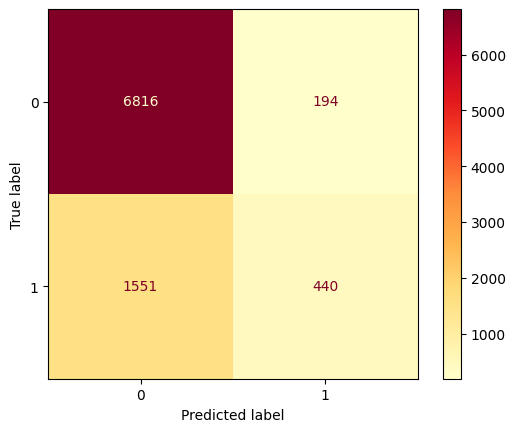

In [24]:
# modelLR = LogisticRegression(C=10, penalty='l2', solver='liblinear')
modelLR = LogisticRegression(C=0.001, penalty='none', solver='lbfgs')

start = time.time()
modelLR.fit(X_train, y_train)
stop = time.time()

y_pred = modelLR.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['LR'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelLR.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')


In [42]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelLR, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [43]:
# define the model
# modelLR = LogisticRegression(C=10, penalty='l2', solver='liblinear')
modelLR = LogisticRegression(C=0.001, penalty='none', solver='lbfgs')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelLR, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelLR, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Recall: 0.239 (0.016)


In [44]:
n_scores.std()

0.01630707736604658

### Modelo SVM (Kernel linear)

Training time: 129.69584393501282s
Accuracy:  0.7970225530496612
Precision: 0.5740072202166066
Recall: 0.31943746860873934


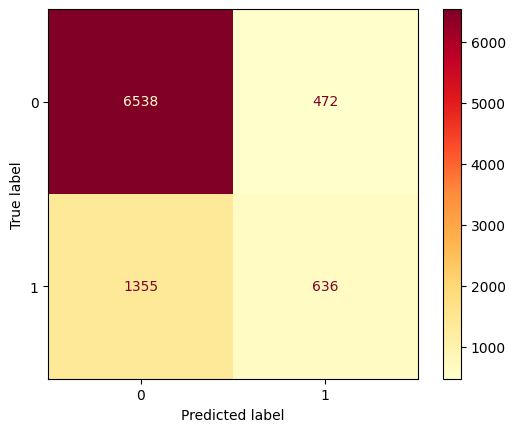

In [45]:
# modelSVM = SVC(C=1000, gamma=0.1, kernel='rbf')
modelSVM = SVC(C=1000, gamma=1, kernel='rbf')

start = time.time()
modelSVM.fit(X_train, y_train)
stop = time.time()

y_pred = modelSVM.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['SVM'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelSVM.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [46]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelSVM, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [47]:
# define the model
# modelSVM = SVC(C=1000, gamma=0.1, kernel='rbf')
modelSVM = SVC(C=1000, gamma=1, kernel='rbf')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelSVM, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelSVM, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.338 (0.019)


### Modelo KNN

Training time: 0.005548238754272461s
Accuracy:  0.7280302188645706
Precision: 0.3854636591478697
Recall: 0.38623807132094423


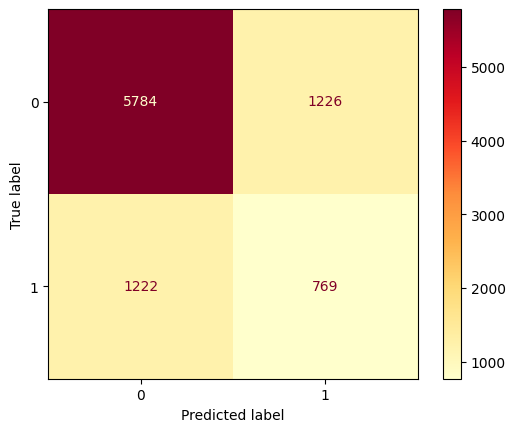

In [48]:
# modelKNN = KNeighborsClassifier(n_neighbors=25)
modelKNN = KNeighborsClassifier(n_neighbors=1)

# Train the modelKNN using the training sets
start = time.time()
modelKNN.fit(X_train, y_train)
stop = time.time()

#Predict Output
y_pred = modelKNN.predict(X_test)

print(f"Training time: {stop - start}s")
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['KNN'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelKNN.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [49]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelKNN, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [50]:
# define the model
# modelKNN = KNeighborsClassifier(n_neighbors=25)
modelKNN = KNeighborsClassifier(n_neighbors=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelKNN, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelKNN, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Accuracy: 0.387 (0.015)


### Modelo de árvore de decisão (max_depth=3)

Training time: 0.32774972915649414s
Accuracy:  0.8021330963226309
Precision: 0.5860655737704918
Recall: 0.35911602209944754


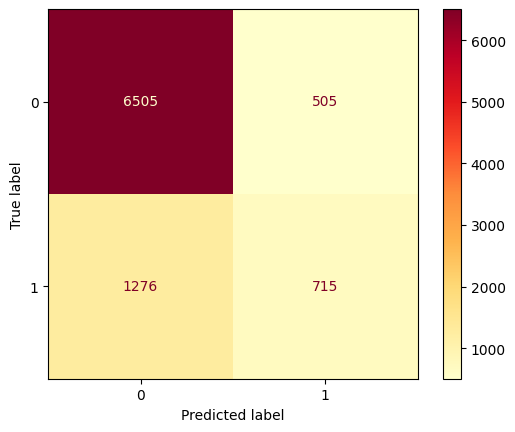

In [51]:
# Create Decision Tree classifer object
# modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
start = time.time()
modelDT = modelDT.fit(X_train,y_train)
stop = time.time()

#Predict the response for test dataset
y_pred = modelDT.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['DT'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelDT.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [52]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelDT, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [53]:
# define the model
# modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=12)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelDT, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelDT, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.365 (0.023)


### Modelo ANN (256,128,64,32), relu

In [54]:
# modelANN = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu", batch_size=50, max_iter=10, random_state=1)

# start = time.time()
# modelANN.fit(X_train,y_train)
# stop = time.time()

# y_pred=modelANN.predict(X_test)

# print(f"Training time: {stop - start}s")

# print(modelANN.score(X_test, y_test))

# print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# Models_Metrics['ANN'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

# cm = confusion_matrix(y_test, y_pred, labels=modelANN.classes_)
# ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [55]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelANN, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [56]:
# # define the model
# modelANN = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu", batch_size=50, max_iter=10, random_state=1)
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelANN, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

### Modelo de Random Forest

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training time ANOVA: 3.6481096744537354s
Accuracy:  0.8133540717698033
Precision: 0.6325660699062233
Recall: 0.37267704671019586
F1Score: 0.46902654867256627


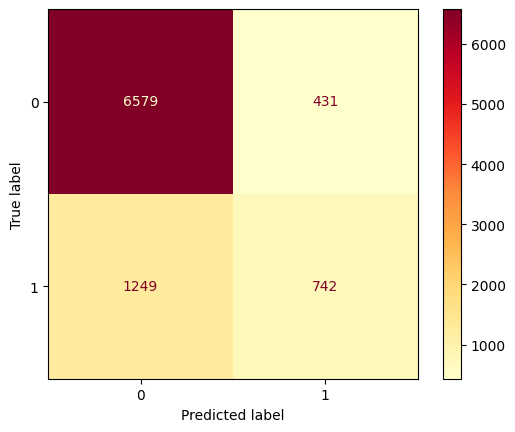

In [57]:
## Modelo de regressão Logística
# modelRF = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 1000, random_state = 1, n_jobs = -1)
modelRF = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto', n_estimators = 500, random_state = 1, n_jobs = -1)

start = time.time()
modelRF.fit(X_train, y_train)
stop = time.time()

y_pred = modelRF.predict(X_test)

print(f"Training time ANOVA: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Model F1 Score: harmonic mean between precision and recall.
print("F1Score:",metrics.f1_score(y_test, y_pred, average='binary'))

Models_Metrics['RF'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelRF.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [58]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelRF, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [59]:
# define the model
# modelRF = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 1000, random_state = 1, n_jobs = -1)
modelRF = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto', n_estimators = 500, random_state = 1, n_jobs = -1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelRF, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelRF, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.377 (0.015)


### Modelo de AdaBoost

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time: 8.1963791847229s
Accuracy:  0.8032440839906677
Precision: 0.5892857142857143
Recall: 0.36464088397790057


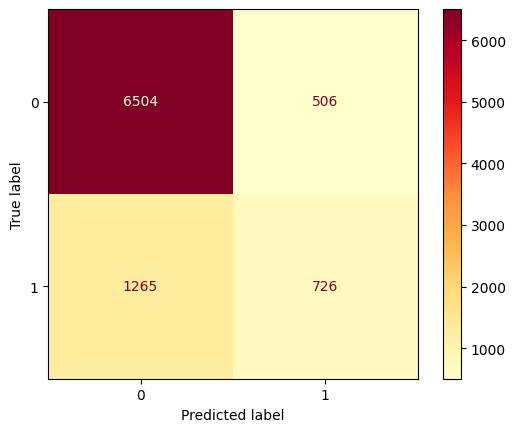

In [60]:
# modelAB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100)
modelAB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100)

start = time.time()
modelAB.fit(X_train, y_train)
stop = time.time()

y_pred = modelAB.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['AdaBoost'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelAB.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')


In [61]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelAB, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [62]:
# define the model
# modelAB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100)
modelAB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelAB, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelAB, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.364 (0.020)


### Modelo de Gradient Boosted Decision Tree (GBDT)

Training time: 115.71080160140991s
Accuracy:  0.7823575158315743
Precision: 0.5101265822784811
Recall: 0.4048216976393772


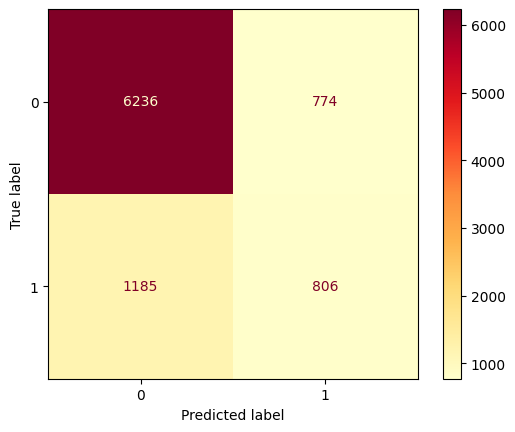

In [63]:
# modelGBDT = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
modelGBDT = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)

start = time.time()
modelGBDT.fit(X_train, y_train)
stop = time.time()

y_pred = modelGBDT.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['GBDT'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelGBDT.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')


In [64]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelGBDT, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [65]:
# define the model
# modelGBDT = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
modelGBDT = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelGBDT, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelGBDT, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Accuracy: 0.393 (0.021)


## Oversampling

### BorderLine SMOTE

In [66]:
smote_border = BorderlineSMOTE(random_state = 1, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(X_train, y_train)

#### Modelo de regressão Logística

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Training time: 0.1786048412322998s
Accuracy:  0.6453727363626264
Precision: 0.34653718374648607
Recall: 0.6810647915620291


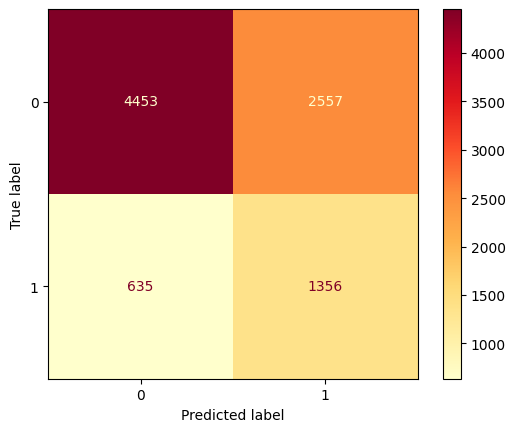

In [67]:
# modelLR_borderline = LogisticRegression(C=10, penalty='l2', solver='liblinear')
modelLR_borderline = LogisticRegression(C=0.001, penalty='none', solver='lbfgs')

start = time.time()
modelLR_borderline.fit(X_smoteborder, y_smoteborder)
stop = time.time()

y_pred = modelLR_borderline.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['LR_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelLR_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [68]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelLR_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [69]:
# define the model
# modelLR_borderline = LogisticRegression(C=10, penalty='l2', solver='liblinear')
modelLR_borderline = LogisticRegression(C=0.001, penalty='none', solver='lbfgs')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelLR_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelLR_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.239 (0.016)


#### Modelo SVM

Training time: 308.2949779033661s
Accuracy:  0.6987001444283969
Precision: 0.38238172920065255
Recall: 0.5886489201406329


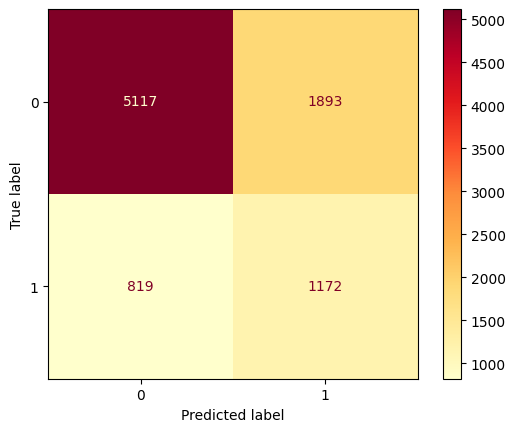

In [70]:
# modelSVM_borderline = SVC(C=1000, gamma=0.1, kernel='rbf')
modelSVM_borderline = SVC(C=1000, gamma=1, kernel='rbf')

start = time.time()
modelSVM_borderline.fit(X_smoteborder, y_smoteborder)
stop = time.time()

y_pred = modelSVM_borderline.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['SVM_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelSVM_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [71]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelSVM_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [72]:
# define the model
# modelSVM_borderline = SVC(C=1000, gamma=0.1, kernel='rbf')
modelSVM_borderline = SVC(C=1000, gamma=1, kernel='rbf')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelSVM_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelSVM_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.338 (0.019)


#### Modelo KNN

Training time: 0.008000373840332031s
Accuracy:  0.6811465392734141
Precision: 0.34023991275899673
Recall: 0.47011551983927674


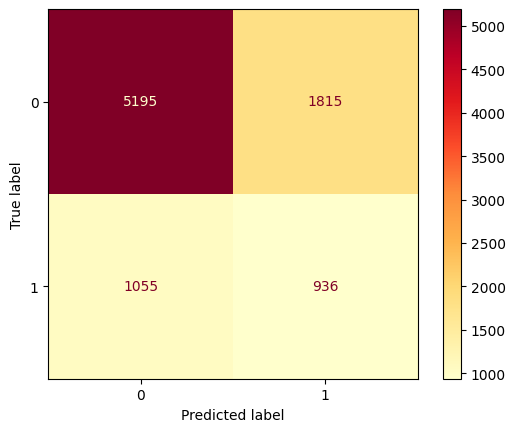

In [73]:
# modelKNN_borderline = KNeighborsClassifier(n_neighbors=25)
modelKNN_borderline = KNeighborsClassifier(n_neighbors=1)

# Train the modelKNN_borderline using the training sets
start = time.time()
modelKNN_borderline.fit(X_smoteborder, y_smoteborder)
stop = time.time()

#Predict Output
y_pred = modelKNN_borderline.predict(X_test)

print(f"Training time: {stop - start}s")
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['KNN_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelKNN_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [74]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelKNN_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [75]:
# define the model
# modelKNN_borderline = KNeighborsClassifier(n_neighbors=25)
modelKNN_borderline = KNeighborsClassifier(n_neighbors=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelKNN_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelKNN_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.387 (0.015)


#### Modelo de árvore de decisão

Training time: 0.548039436340332s
Accuracy:  0.7712476391512054
Precision: 0.48360655737704916
Recall: 0.5037669512807634


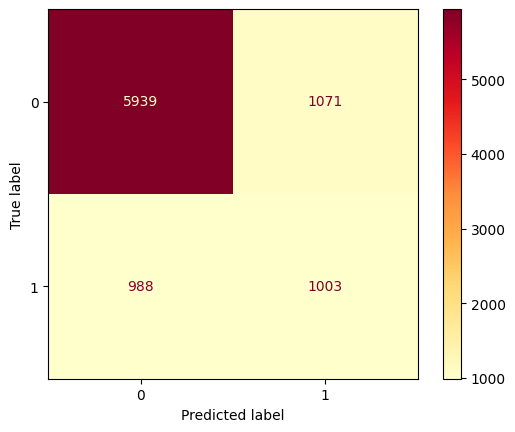

In [76]:
# Create Decision Tree classifer object
# modelDT_borderline = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelDT_borderline = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
start = time.time()
modelDT_borderline = modelDT_borderline.fit(X_smoteborder,y_smoteborder)
stop = time.time()

#Predict the response for test dataset
y_pred = modelDT_borderline.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['DT_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelDT_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [77]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelDT_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [78]:
# define the model
# modelDT_borderline = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelDT_borderline = DecisionTreeClassifier(criterion="entropy", max_depth=12)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelDT_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelDT_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Accuracy: 0.368 (0.023)


#### Modelo ANN (256,128,64,32), relu

In [79]:
# modelANN_borderline = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu", batch_size=50, max_iter=10, random_state=1)

# start = time.time()
# modelANN_borderline.fit(X_smoteborder,y_smoteborder)
# stop = time.time()

# y_pred=modelANN_borderline.predict(X_test)

# print(f"Training time: {stop - start}s")

# print(modelANN_borderline.score(X_test, y_test))

# print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# Models_Metrics['ANN_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

# cm = confusion_matrix(y_test, y_pred, labels=modelANN_borderline.classes_)
# ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [80]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelANN_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [81]:
# # define the model
# modelANN_borderline = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu", batch_size=50, max_iter=10, random_state=1)
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelANN_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#### Modelo de Random Forest

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training time ANOVA: 5.59017014503479s
Accuracy:  0.8011332074213976
Precision: 0.5646302250803859
Recall: 0.44098442993470616
F1Score: 0.4952058657642414


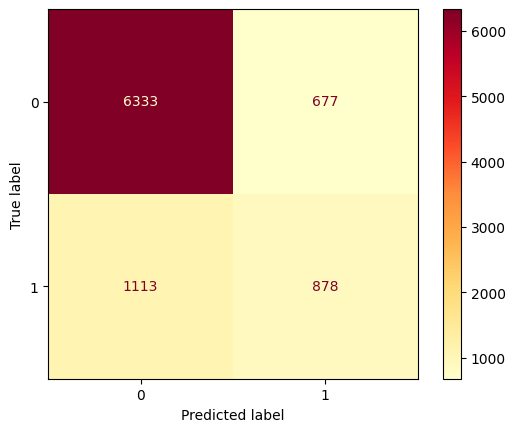

In [82]:
# modelRF_borderline = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 1000, random_state = 1, n_jobs = -1)
modelRF_borderline = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto', n_estimators = 500, random_state = 1, n_jobs = -1)

start = time.time()
modelRF_borderline.fit(X_smoteborder, y_smoteborder)
stop = time.time()

y_pred = modelRF_borderline.predict(X_test)

print(f"Training time ANOVA: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Model F1 Score: harmonic mean between precision and recall.
print("F1Score:",metrics.f1_score(y_test, y_pred, average='binary'))

Models_Metrics['RF_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelRF_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [83]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelRF_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [84]:
# del(modelRF_borderline)

In [85]:
# define the model
# modelRF_borderline = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 1000, random_state = 1, n_jobs = -1)
modelRF_borderline = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto', n_estimators = 500, random_state = 1, n_jobs = -1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelRF_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelRF_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Accuracy: 0.377 (0.015)


#### Modelo de AdaBoost

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time: 15.505821228027344s
Accuracy:  0.7896900344406177
Precision: 0.5345070422535211
Recall: 0.3812154696132597


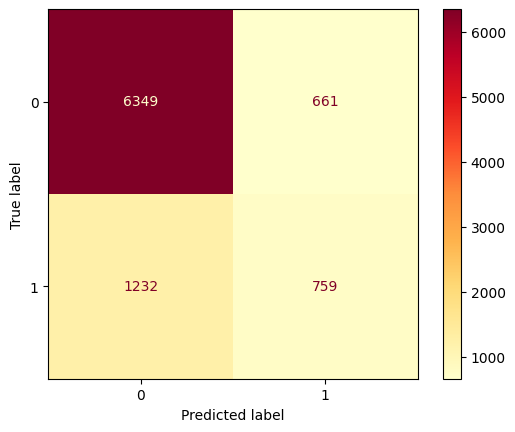

In [86]:
# modelAB_borderline = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100)
modelAB_borderline = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100)

start = time.time()
modelAB_borderline.fit(X_smoteborder, y_smoteborder)
stop = time.time()

y_pred = modelAB_borderline.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['AdaBoost_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelAB_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [87]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelAB_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [88]:
# define the model
# modelAB_borderline = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100)
modelAB_borderline = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelAB_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelAB_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.364 (0.019)


#### Modelo de Gradient Boosted Decision Tree (GBDT)

Training time: 219.54891633987427s
Accuracy:  0.7806910343295189
Precision: 0.5053091817613992
Recall: 0.40632847815168255


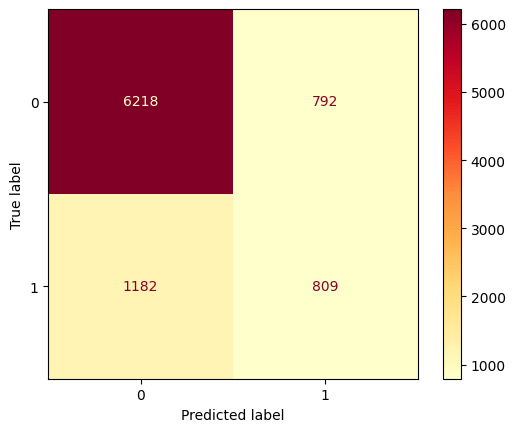

In [89]:
# modelGBDT_borderline = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
modelGBDT_borderline = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)

start = time.time()
modelGBDT_borderline.fit(X_smoteborder, y_smoteborder)
stop = time.time()

y_pred = modelGBDT_borderline.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['GBDT_borderline'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelGBDT_borderline.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [90]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelGBDT_borderline, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [91]:
# define the model
# modelGBDT_borderline = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
modelGBDT_borderline = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelGBDT_borderline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelGBDT_borderline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.391 (0.019)


### K-Means SMOTE

In [92]:
smote_kmeans = KMeansSMOTE(random_state = 1, n_jobs=-1, cluster_balance_threshold= 0.25)
X_smotekmeans, y_smotekmeans = smote_kmeans.fit_resample(X_train, y_train)

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Modelo de regressão Logística

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Training time: 0.12888288497924805s
Accuracy:  0.6831463170758805
Precision: 0.34441633538127936
Recall: 0.4786539427423405


C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


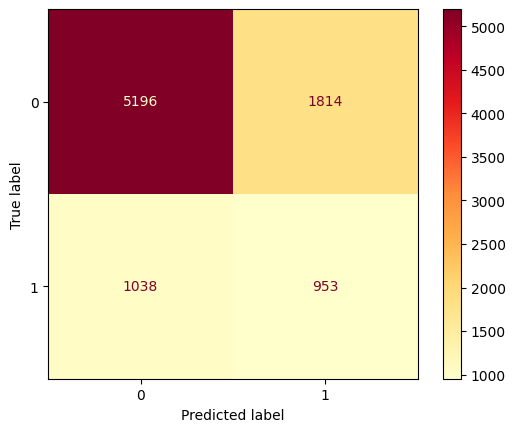

In [93]:
# modelLR_kmeanSmote = LogisticRegression(C=10, penalty='l2', solver='liblinear')
modelLR_kmeanSmote = LogisticRegression(C=0.001, penalty='none', solver='lbfgs')

start = time.time()
modelLR_kmeanSmote.fit(X_smotekmeans, y_smotekmeans)
stop = time.time()

y_pred = modelLR_kmeanSmote.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['LR_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelLR_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [94]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelLR_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [95]:
# define the model
# modelLR_kmeanSmote = LogisticRegression(C=10, penalty='l2', solver='liblinear')
modelLR_kmeanSmote = LogisticRegression(C=0.001, penalty='none', solver='lbfgs')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelLR_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelLR_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.239 (0.016)


#### Modelo SVM

Training time: 284.6769380569458s
Accuracy:  0.7445839351183202
Precision: 0.42230070635721495
Recall: 0.4203917629331994


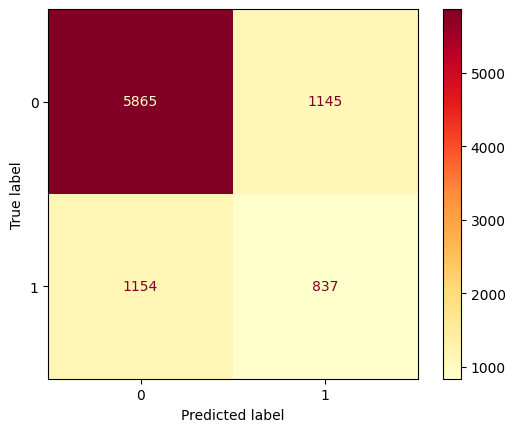

In [96]:
# modelSVM_kmeanSmote = SVC(C=1000, gamma=0.1, kernel='rbf')
modelSVM_kmeanSmote = SVC(C=1000, gamma=1, kernel='rbf')

start = time.time()
modelSVM_kmeanSmote.fit(X_smotekmeans, y_smotekmeans)
stop = time.time()

y_pred = modelSVM_kmeanSmote.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['SVM_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelSVM_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [97]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelSVM_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [98]:
# define the model
# modelSVM_kmeanSmote = SVC(C=1000, gamma=0.1, kernel='rbf')
modelSVM_kmeanSmote = SVC(C=1000, gamma=1, kernel='rbf')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelSVM_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelSVM_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.338 (0.019)


#### Modelo KNN

Training time: 0.008228063583374023s
Accuracy:  0.7201422064215087
Precision: 0.3752362948960302
Recall: 0.3987945755901557


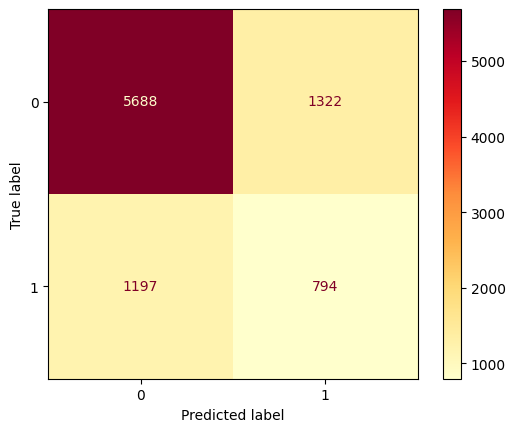

In [99]:
# modelKNN_kmeanSmote = KNeighborsClassifier(n_neighbors=25)
modelKNN_kmeanSmote = KNeighborsClassifier(n_neighbors=1)

# Train the modelKNN_kmeanSmote using the training sets
start = time.time()
modelKNN_kmeanSmote.fit(X_smotekmeans, y_smotekmeans)
stop = time.time()

#Predict Output
y_pred = modelKNN_kmeanSmote.predict(X_test)

print(f"Training time: {stop - start}s")
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['KNN_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelKNN_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [100]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelKNN_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [101]:
# define the model
# modelKNN_kmeanSmote = KNeighborsClassifier(n_neighbors=25)
modelKNN_kmeanSmote = KNeighborsClassifier(n_neighbors=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelKNN_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelKNN_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.387 (0.015)


#### Modelo de árvore de decisão

Training time: 0.5401673316955566s
Accuracy:  0.7626930341073214
Precision: 0.45969983324068925
Recall: 0.4153691612255148


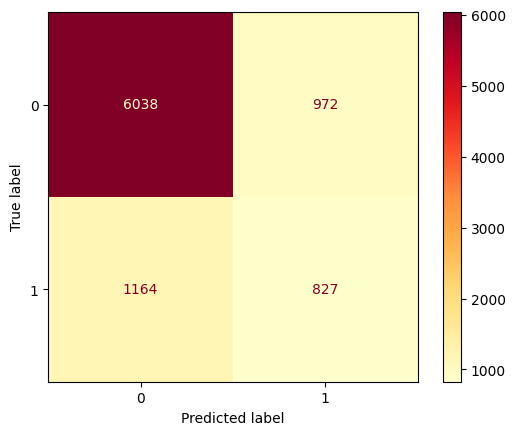

In [102]:
# Create Decision Tree classifer object
# modelDT_kmeanSmote = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelDT_kmeanSmote = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
start = time.time()
modelDT_kmeanSmote = modelDT_kmeanSmote.fit(X_smotekmeans,y_smotekmeans)
stop = time.time()

#Predict the response for test dataset
y_pred = modelDT_kmeanSmote.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['DT_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelDT_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [103]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelDT_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [104]:
# define the model
# modelDT_kmeanSmote = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelDT_kmeanSmote = DecisionTreeClassifier(criterion="entropy", max_depth=12)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelDT_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelDT_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.367 (0.021)


#### Modelo ANN (256,128,64,32), relu

In [105]:
# modelANN_kmeanSmote = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu", batch_size=50, max_iter=10, random_state=1)

# start = time.time()
# modelANN_kmeanSmote.fit(X_smotekmeans,y_smotekmeans)
# stop = time.time()

# y_pred=modelANN_kmeanSmote.predict(X_test)

# print(f"Training time: {stop - start}s")

# print(modelANN_kmeanSmote.score(X_test, y_test))

# print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# Models_Metrics['ANN_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

# cm = confusion_matrix(y_test, y_pred, labels=modelANN_kmeanSmote.classes_)
# ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [106]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelANN_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [107]:
# # define the model
# modelANN_kmeanSmote = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu", batch_size=50, max_iter=10, random_state=1)
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelANN_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#### Modelo de Random Forest

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training time ANOVA: 5.770953178405762s
Accuracy:  0.8047994667259193
Precision: 0.5891768292682927
Recall: 0.38824711200401807
F1Score: 0.46805933999394495


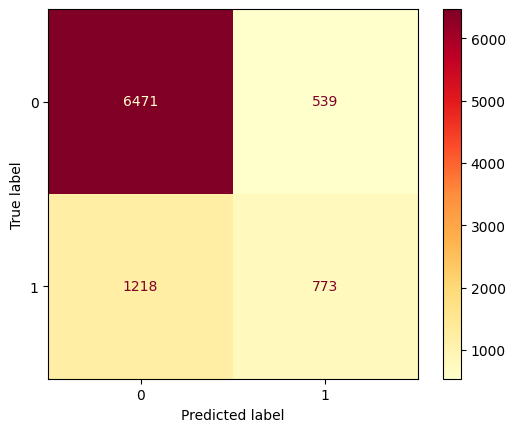

In [108]:
# modelRF_kmeanSmote = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 1000, random_state = 1, n_jobs = -1)
modelRF_kmeanSmote = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto', n_estimators = 500, random_state = 1, n_jobs = -1)

start = time.time()
modelRF_kmeanSmote.fit(X_smotekmeans, y_smotekmeans)
stop = time.time()

y_pred = modelRF_kmeanSmote.predict(X_test)

print(f"Training time ANOVA: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Model F1 Score: harmonic mean between precision and recall.
print("F1Score:",metrics.f1_score(y_test, y_pred, average='binary'))

Models_Metrics['RF_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelRF_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [109]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelRF_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [110]:
# define the model
# modelRF_kmeanSmote = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 1000, random_state = 1, n_jobs = -1)
modelRF_kmeanSmote = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto', n_estimators = 500, random_state = 1, n_jobs = -1)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelRF_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelRF_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.377 (0.015)


#### Modelo de AdaBoost

C:\Users\yamad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time: 14.908499717712402s
Accuracy:  0.7808021330963226
Precision: 0.5057106598984772
Recall: 0.4003013561024611


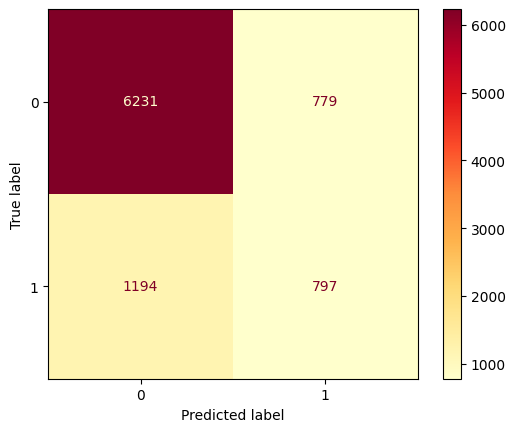

In [111]:
# modelAB_kmeanSmote = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100)
modelAB_kmeanSmote = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100)

start = time.time()
modelAB_kmeanSmote.fit(X_smotekmeans, y_smotekmeans)
stop = time.time()

y_pred = modelAB_kmeanSmote.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['AdaBoost_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelAB_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [112]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelAB_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [113]:
# define the model
# modelAB_kmeanSmote = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100)
modelAB_kmeanSmote = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(modelAB_kmeanSmote, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores = cross_val_score(modelAB_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

Recall: 0.364 (0.019)


#### Modelo de Gradient Boosted Decision Tree (GBDT)

Training time: 208.95151710510254s
Accuracy:  0.7791356515942673
Precision: 0.5008675534991325
Recall: 0.4349573078854847


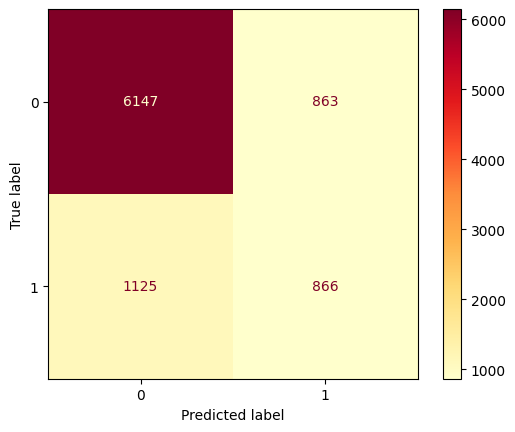

In [114]:
# modelGBDT_kmeanSmote = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
modelGBDT_kmeanSmote = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)

start = time.time()
modelGBDT_kmeanSmote.fit(X_smotekmeans, y_smotekmeans)
stop = time.time()

y_pred = modelGBDT_kmeanSmote.predict(X_test)

print(f"Training time: {stop - start}s")

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Models_Metrics['GBDT_kmeanSmote'] = [stop - start, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

cm = confusion_matrix(y_test, y_pred, labels=modelGBDT_kmeanSmote.classes_)
ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')

In [115]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(modelGBDT_kmeanSmote, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [123]:
# define the model
# modelGBDT_kmeanSmote = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
modelGBDT_kmeanSmote = GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelGBDT_kmeanSmote, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Recall: %.3f (%.3f)' % ((n_scores.mean()), (n_scores.std())))

TypeError: Singleton array 5.6 cannot be considered a valid collection.

In [117]:
Models_Metrics

{'LR': [0.08873367309570312,
  0.8061326519275636,
  0.694006309148265,
  0.22099447513812154],
 'SVM': [129.69584393501282,
  0.7970225530496612,
  0.5740072202166066,
  0.31943746860873934],
 'KNN': [0.005548238754272461,
  0.7280302188645706,
  0.3854636591478697,
  0.38623807132094423],
 'DT': [0.32774972915649414,
  0.8021330963226309,
  0.5860655737704918,
  0.35911602209944754],
 'RF': [3.6481096744537354,
  0.8133540717698033,
  0.6325660699062233,
  0.37267704671019586],
 'AdaBoost': [8.1963791847229,
  0.8032440839906677,
  0.5892857142857143,
  0.36464088397790057],
 'GBDT': [115.71080160140991,
  0.7823575158315743,
  0.5101265822784811,
  0.4048216976393772],
 'LR_borderline': [0.1786048412322998,
  0.6453727363626264,
  0.34653718374648607,
  0.6810647915620291],
 'SVM_borderline': [308.2949779033661,
  0.6987001444283969,
  0.38238172920065255,
  0.5886489201406329],
 'KNN_borderline': [0.008000373840332031,
  0.6811465392734141,
  0.34023991275899673,
  0.47011551983927

## Visualização das métricas

In [6]:
temposTreinamento = {'LR': 0.17515, 
                     'SVM': 46.18055, 
                     'KNN': 0.00481, 
                     'DT': 0.07184, 
                    #  'ANN': 6.70663, 
                     'RF': 4.83856, 
                     'AdaBoost': 10807.46709, 
                     'GBDT': 3.39561}
temposTreinamentoBorderline = {'LR': 0.18784, 
                               'SVM': 85.85106, 
                               'KNN': 0.01009, 
                               'DT': 0.12004, 
                            #    'ANN': 11.45579, 
                               'RF': 7.72844, 
                               'AdaBoost': 21.06838, 
                               'GBDT': 6.85153}
temposTreinamentoKmeanSmote = {'LR': 0.18000, 
                               'SVM': 752.32339, 
                               'KNN': 0.01051, 
                               'DT': 0.11104, 
                            #    'ANN': 10.90702, 
                               'RF': 7.37893, 
                               'AdaBoost': 19.28080, 
                               'GBDT': 6.44322}

temposTreinamentoTotal = {'LR_Desb': 0.17515, 
                     'SVM_Desb': 46.18055, 
                     'KNN_Desb': 0.00481, 
                     'DT_Desb': 0.07184, 
                    #  'ANN_Desb': 6.70663, 
                     'RF_Desb': 4.83856, 
                     'AdaBoost_Desb': 10807.46709, 
                     'GBDT_Desb': 3.39561,
                     'LR_Border': 0.18784, 
                     'SVM_Border': 85.85106, 
                     'KNN_Border': 0.01009, 
                     'DT_Border': 0.12004, 
                  #    'ANN_Border': 11.45579, 
                     'RF_Border': 7.72844, 
                     'AdaBoost_Border': 21.06838, 
                     'GBDT_Border': 6.85153,
                     'LR_Kmeans': 0.18000, 
                     'SVM_Kmeans': 752.32339, 
                     'KNN_Kmeans': 0.01051, 
                     'DT_Kmeans': 0.11104, 
                  #    'ANN_Kmeans': 10.90702, 
                     'RF_Kmeans': 7.37893, 
                     'AdaBoost_Kmeans': 19.28080, 
                     'GBDT_Kmeans': 6.44322}

acuracias = {'LR': 0.80758, 
             'SVM': 0.81935, 
             'KNN': 0.80791, 
             'DT': 0.81835, 
            #  'ANN': 0.82013, 
             'RF': 0.81958, 
             'AdaBoost': 0.81991, 
             'GBDT': 0.82013}
acuraciasBorderline = {'LR': 0.64693, 
                       'SVM': 0.71536, 
                       'KNN': 0.66182, 
                       'DT': 0.76614, 
                    #    'ANN': 0.72425, 
                       'RF': 0.79502, 
                       'AdaBoost': 0.80047, 
                       'GBDT': 0.79880}
acuraciasKmeanSmote = {'LR': 0.68404, 
                       'SVM':0.73125, 
                       'KNN': 0.74636, 
                       'DT': 0.68503, 
                    #    'ANN': 0.72592, 
                       'RF': 0.77047, 
                       'AdaBoost': 0.72481, 
                       'GBDT': 0.74125}

acuraciasTotal = {'LR_Desb': 0.80758, 
             'SVM_Desb': 0.81935, 
             'KNN_Desb': 0.80791, 
             'DT_Desb': 0.81835, 
            #  'ANN_Desb': 0.82013, 
             'RF_Desb': 0.81958, 
             'AdaBoost_Desb': 0.81991, 
             'GBDT_Desb': 0.82013,
             'LR_Border': 0.64693, 
            'SVM_Border': 0.71536, 
            'KNN_Border': 0.66182, 
            'DT_Border': 0.76614, 
         #    'ANN_Border': 0.72425, 
            'RF_Border': 0.79502, 
            'AdaBoost_Border': 0.80047, 
            'GBDT_Border': 0.79880,
            'LR_Kmeans': 0.68404, 
            'SVM_Kmeans':0.73125, 
            'KNN_Kmeans': 0.74636, 
            'DT_Kmeans': 0.68503, 
         #    'ANN_Kmeans': 0.72592, 
            'RF_Kmeans': 0.77047, 
            'AdaBoost_Kmeans': 0.72481, 
            'GBDT_Kmeans': 0.74125}

precisoes = {'LR': 0.70203, 
             'SVM': 0.69477, 
             'KNN': 0.65092, 
             'DT': 0.68977, 
            #  'ANN': 0.67681, 
             'RF': 0.67695, 
             'AdaBoost': 0.68209, 
             'GBDT': 0.67714}
precisoesBorderline = {'LR': 0.34715, 
                       'SVM': 0.41019, 
                       'KNN': 0.36075, 
                       'DT': 0.47702, 
                    #    'ANN': 0.42073, 
                       'RF': 0.53582, 
                       'AdaBoost': 0.55562, 
                       'GBDT': 0.54742}
precisoesKmeanSmote = {'LR': 0.34564, 
                       'SVM':0.40246, 
                       'KNN': 0.42134, 
                       'DT': 0.34643, 
                    #    'ANN': 0.41433, 
                       'RF': 0.48042, 
                       'AdaBoost': 0.39490, 
                       'GBDT': 0.42476}

precisoesTotal = {'LR_Desb': 0.70203, 
             'SVM_Desb': 0.69477, 
             'KNN_Desb': 0.65092, 
             'DT_Desb': 0.68977, 
            #  'ANN_Desb': 0.67681, 
             'RF_Desb': 0.67695, 
             'AdaBoost_Desb': 0.68209, 
             'GBDT_Desb': 0.67714,
             'LR_Border': 0.34715, 
            'SVM_Border': 0.41019, 
            'KNN_Border': 0.36075, 
            'DT_Border': 0.47702, 
         #    'ANN_Border': 0.42073, 
            'RF_Border': 0.53582, 
            'AdaBoost_Border': 0.55562, 
            'GBDT_Border': 0.54742,
            'LR_Kmeans': 0.34564, 
            'SVM_Kmeans':0.40246, 
            'KNN_Kmeans': 0.42134, 
            'DT_Kmeans': 0.34643, 
         #    'ANN_Kmeans': 0.41433, 
            'RF_Kmeans': 0.48042, 
            'AdaBoost_Kmeans': 0.39490, 
            'GBDT_Kmeans': 0.42476}

recall = {'LR': 0.22602, 
          'SVM': 0.32697, 
          'KNN': 0.28378, 
          'DT': 0.32496, 
        #   'ANN': 0.35761, 
          'RF': 0.35259, 
          'AdaBoost': 0.34807, 
          'GBDT': 0.35711}
recallBorderline = {'LR': 0.67705, 
                    'SVM': 0.65495, 
                    'KNN': 0.68508, 
                    'DT': 0.59417, 
                    # 'ANN': 0.65445, 
                    'RF': 0.54847, 
                    'AdaBoost': 0.48920, 
                    'GBDT': 0.52185}
recallKmeanSmote = {'LR': 0.47966, 
                    'SVM':0.44350, 
                    'KNN': 0.39277, 
                    'DT': 0.47815, 
                    # 'ANN': 0.57810, 
                    'RF': 0.46208, 
                    'AdaBoost': 0.45856, 
                    'GBDT': 0.47916}

recallTotal = {'LR_Desb': 0.22602, 
          'SVM_Desb': 0.32697, 
          'KNN_Desb': 0.28378, 
          'DT_Desb': 0.32496, 
        #   'ANN_Desb': 0.35761, 
          'RF_Desb': 0.35259, 
          'AdaBoost_Desb': 0.34807, 
          'GBDT_Desb': 0.35711,
          'LR_Border': 0.67705, 
         'SVM_Border': 0.65495, 
         'KNN_Border': 0.68508, 
         'DT_Border': 0.59417, 
         # 'ANN_Border': 0.65445, 
         'RF_Border': 0.54847, 
         'AdaBoost_Border': 0.48920, 
         'GBDT_Border': 0.52185,
         'LR_Kmeans': 0.47966, 
         'SVM_Kmeans':0.44350, 
         'KNN_Kmeans': 0.39277, 
         'DT_Kmeans': 0.47815, 
         # 'ANN_Kmeans': 0.57810, 
         'RF_Kmeans': 0.46208, 
         'AdaBoost_Kmeans': 0.45856, 
         'GBDT_Kmeans': 0.47916}

roc_auc = {'LR': 0.730, 
           'SVM': 0.719, 
           'KNN': 0.733, 
           'DT': 0.722, 
        #    'ANN': 0.754, 
           'RF': 0.786, 
           'AdaBoost': 0.775, 
           'GBDT': 0.784}
acuraciaKFold = {'LR': 0.811, 
                 'SVM': 0.821, 
                 'KNN': 0.810, 
                 'DT': 0.819, 
                #  'ANN': 0.818, 
                 'RF': 0.820, 
                 'AdaBoost': 0.821, 
                 'GBDT': 0.822}

visualizationDict = {'Tempos de treinamento (s)':temposTreinamento, 
                     'Tempos de treinamento - Borderline SMOTE (s)':temposTreinamentoBorderline, 
                     'Tempos de treinamento - K-means SMOTE (s)':temposTreinamentoKmeanSmote, 
                     'Acurácias':acuracias,
                     'Acurácias - Borderline SMOTE':acuraciasBorderline,
                     'Acurácias - K-means SMOTE':acuraciasKmeanSmote,
                     'Precisões':precisoes,
                     'Precisões - Borderline SMOTE':precisoesBorderline,
                     'Precisões - K-means SMOTE':precisoesKmeanSmote,
                     'Recall':recall,
                     'Recall - Borderline SMOTE':recallBorderline,
                     'Recall - K-means SMOTE':recallKmeanSmote,
                     'Curva ROC - Area Under Curve':roc_auc}

visualizationDictTotal = {'Tempos de treinamento (s)':temposTreinamentoTotal, 
                        'Acurácias':acuraciasTotal,
                        'Precisões':precisoesTotal,
                        'Recall':recallTotal,
}


In [7]:
for vis in visualizationDict:
    print(type(vis))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


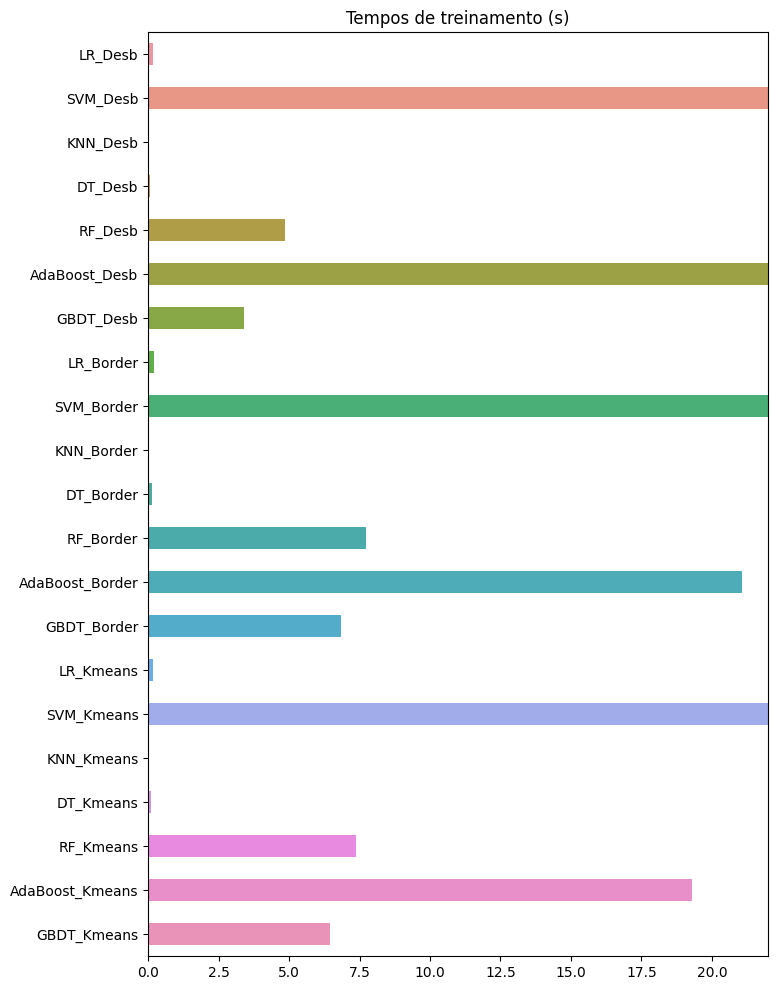

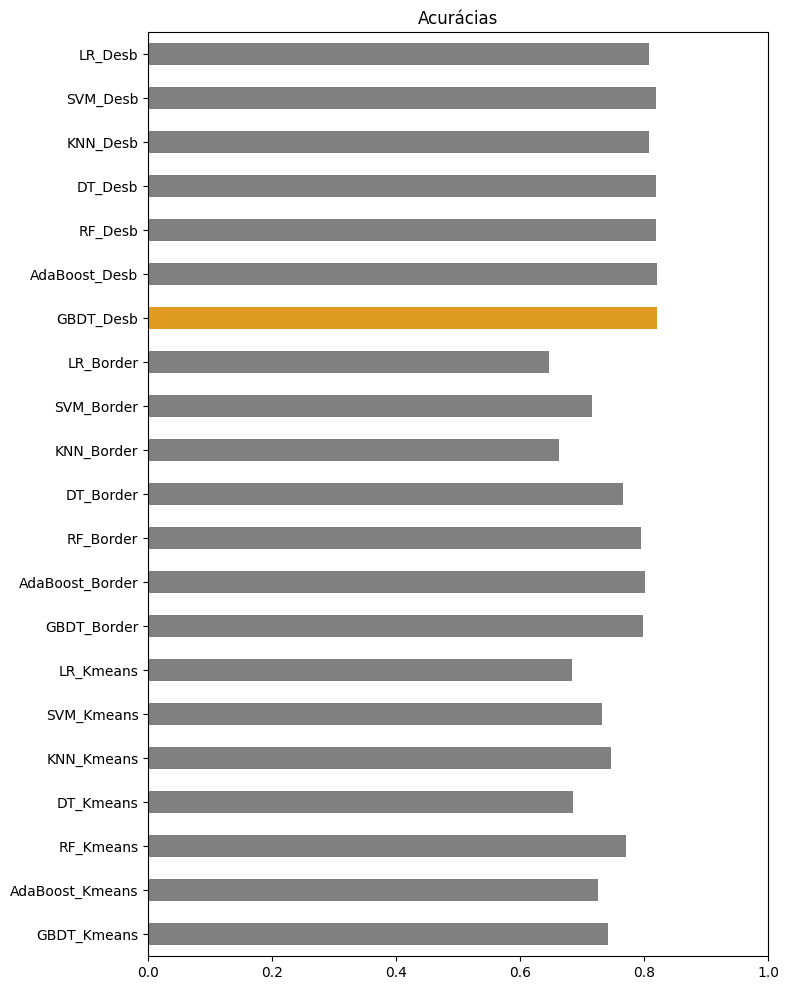

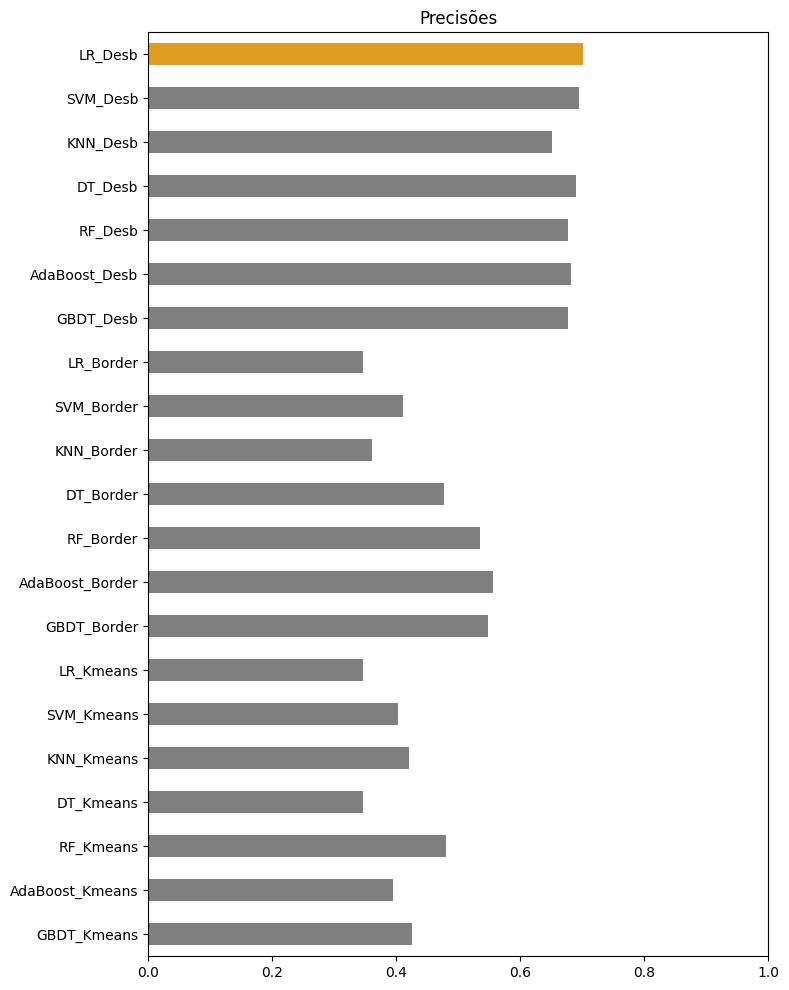

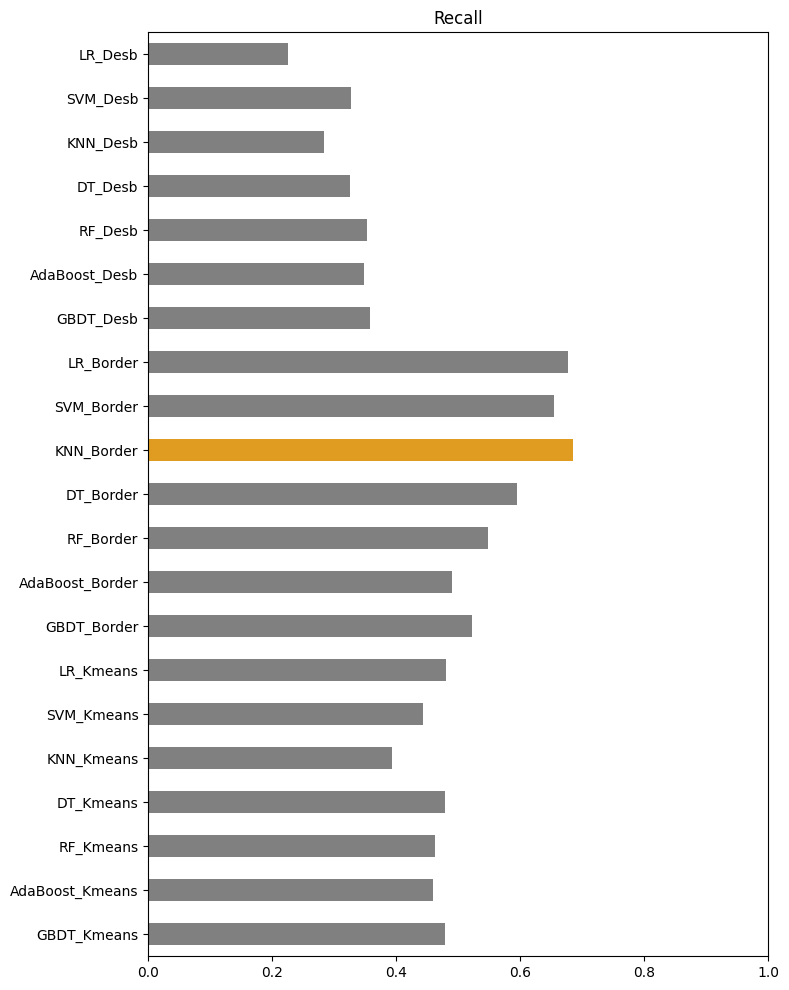

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


for idx, vis in enumerate(visualizationDictTotal):
    #use orange for bar with max value and grey for all other bars
    plt.figure(figsize=(8, 12))
    cols = ['grey' if (x < max(list(visualizationDictTotal[vis].values()))) else 'orange' for x in visualizationDictTotal[vis].values()]
    if(idx>0):
        # chart = sns.barplot(x=list(visualizationDictTotal[vis].values()), y=list(visualizationDictTotal[vis].keys()), orient='h', palette ="mako")
        chart = sns.barplot(x=list(visualizationDictTotal[vis].values()), y=list(visualizationDictTotal[vis].keys()), orient='h', palette =cols)
        chart.set_title(vis)
        # chart.set_xlim(min(list(visualizationDictTotal[vis].values()))-(min(list(visualizationDictTotal[vis].values()))/5), max(list(visualizationDictTotal[vis].values())) + (min(list(visualizationDictTotal[vis].values()))/5))
        chart.set_xlim(0, 1)
    else:
        chart = sns.barplot(x=list(visualizationDictTotal[vis].values()), y=list(visualizationDictTotal[vis].keys()), orient='h')
        chart.set_title(vis)
        chart.set_xlim(0, 22)

    # Loop over the bars, and adjust the width (and position, to keep the bar centred)
    for bar in chart.patches:
        y = bar.get_y()
        height = bar.get_height()
        centre = y+height/2.

        bar.set_y(centre-0.5/2)
        bar.set_height(0.5)

    plt.show()

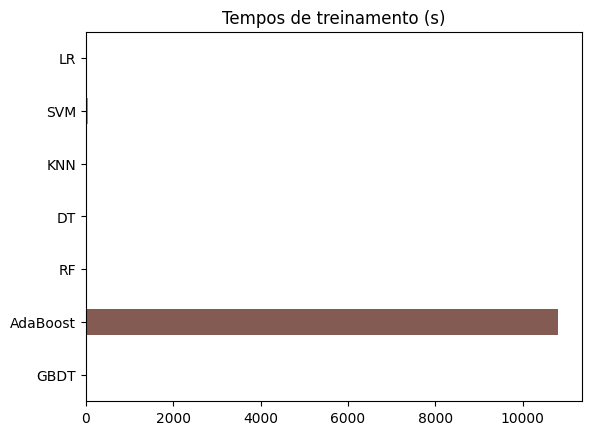

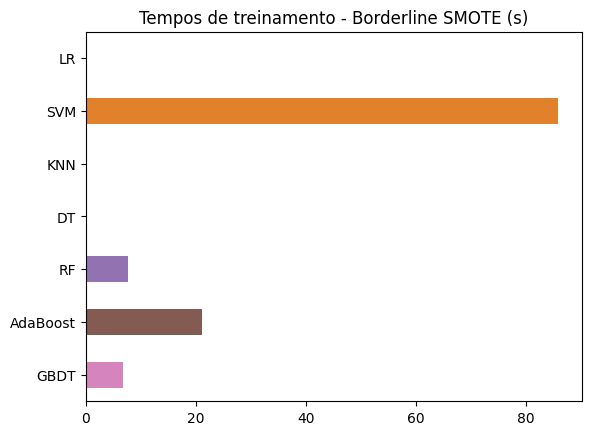

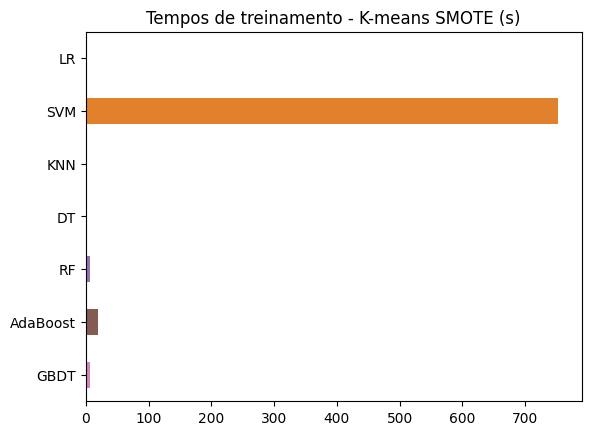

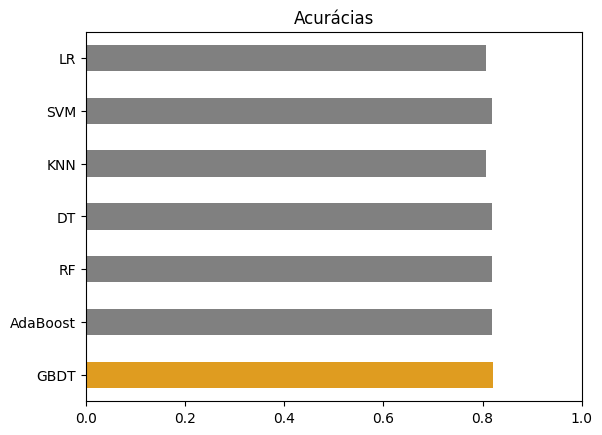

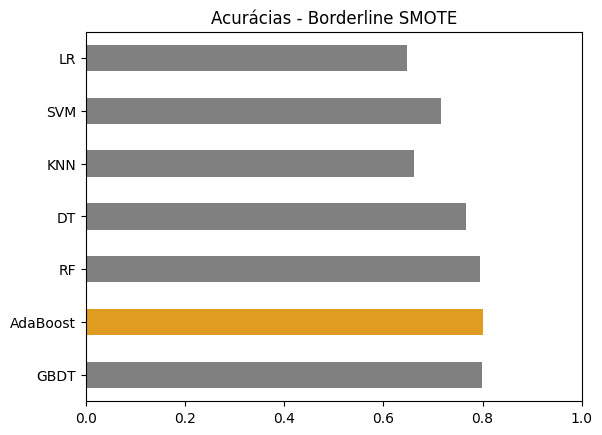

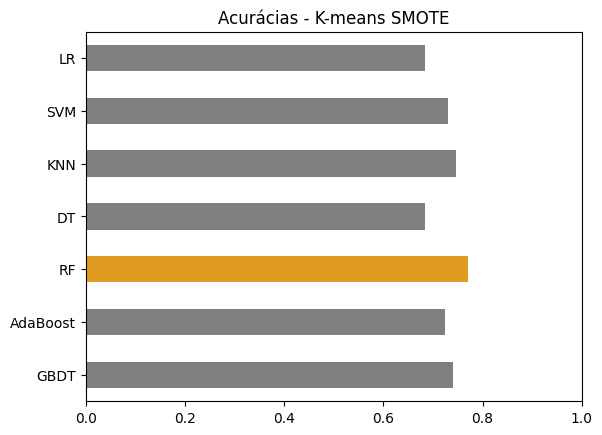

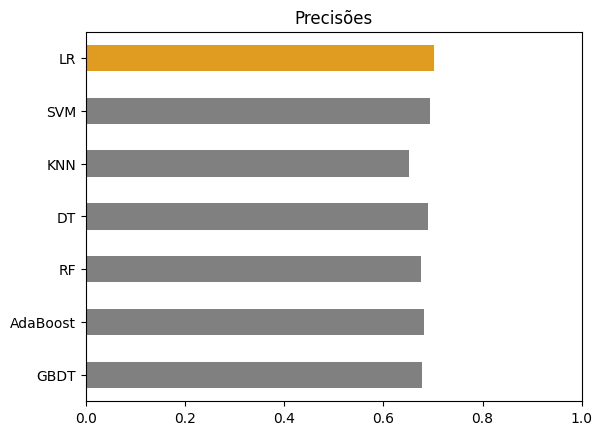

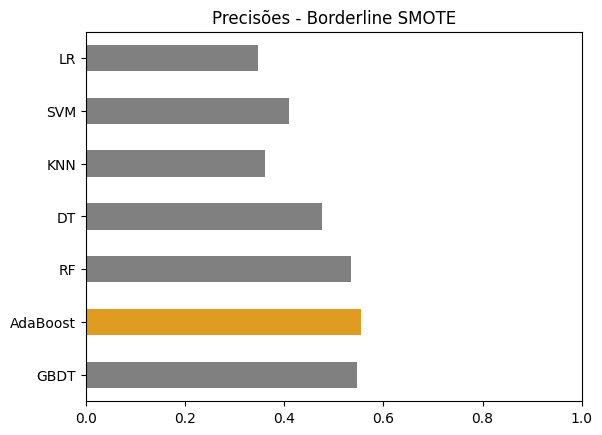

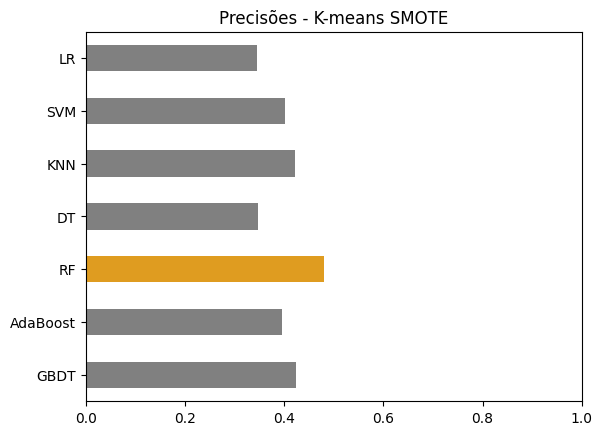

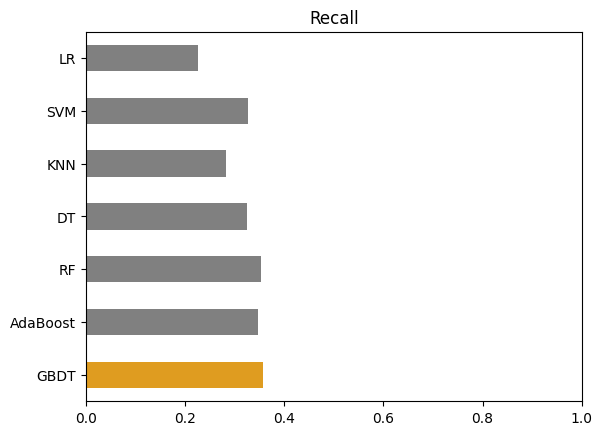

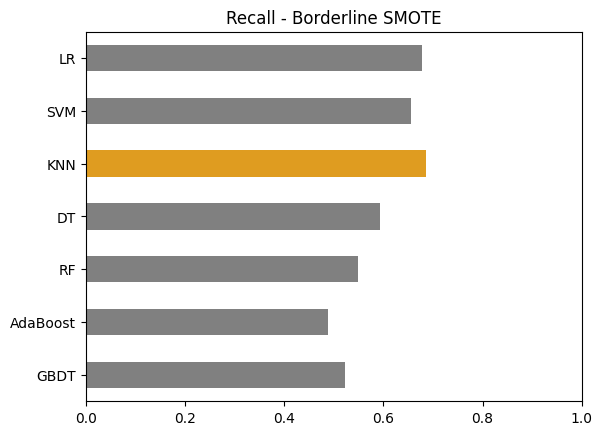

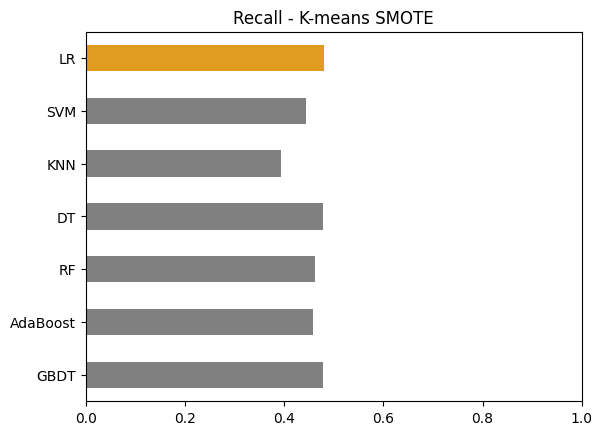

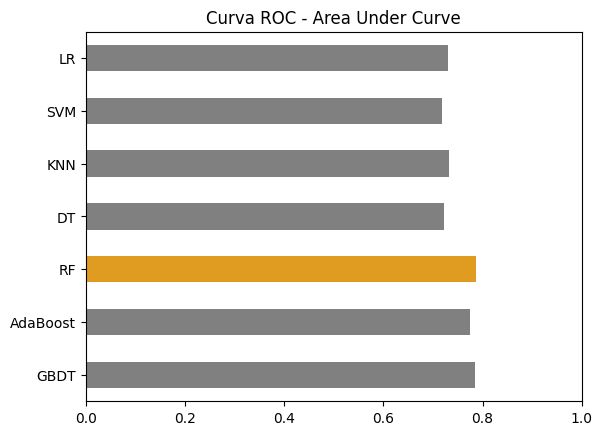

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


for idx, vis in enumerate(visualizationDict):
    #use orange for bar with max value and grey for all other bars
    cols = ['grey' if (x < max(list(visualizationDict[vis].values()))) else 'orange' for x in visualizationDict[vis].values()]
    if(idx>2):
        # chart = sns.barplot(x=list(visualizationDict[vis].values()), y=list(visualizationDict[vis].keys()), orient='h', palette ="mako")
        chart = sns.barplot(x=list(visualizationDict[vis].values()), y=list(visualizationDict[vis].keys()), orient='h', palette =cols)
        chart.set_title(vis)
        # chart.set_xlim(min(list(visualizationDict[vis].values()))-(min(list(visualizationDict[vis].values()))/5), max(list(visualizationDict[vis].values())) + (min(list(visualizationDict[vis].values()))/5))
        chart.set_xlim(0, 1)
    else:
        chart = sns.barplot(x=list(visualizationDict[vis].values()), y=list(visualizationDict[vis].keys()), orient='h')
        chart.set_title(vis)

    # Loop over the bars, and adjust the width (and position, to keep the bar centred)
    for bar in chart.patches:
        y = bar.get_y()
        height = bar.get_height()
        centre = y+height/2.

        bar.set_y(centre-0.5/2)
        bar.set_height(0.5)

    plt.show()